In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Logistics Regression

## we  will perform following steps

1. Cleaning the data (treatin null values)
2. Encoding
3. Scaling the data
4. building the Logistics mdoel with stats model 
5. We shall evaluate the model
6. Building the ROC Curve
7. Finding the optimal cut off value

## Cleaning the data (treating null values)

In [5]:
df.isnull().sum() / len(df) *100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

as we see there is a lot of coloumns that are null some are more than 50% and some are more than 45%""

In [6]:
# we shall replace the value 'Select in the dataframe with Nan as it is equivalent to null value'
df = df.replace(to_replace ="Select",
                 value =np.NaN)

In [7]:
df.isnull().sum() / len(df) *100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
# replacing null values in tags as no_tags as this may be influencing factor 
df['Tags'].fillna('no_tag')

0               Interested in other courses
1                                   Ringing
2       Will revert after reading the email
3                                   Ringing
4       Will revert after reading the email
                       ...                 
9235    Will revert after reading the email
9236                     wrong number given
9237                         invalid number
9238                                 no_tag
9239    Will revert after reading the email
Name: Tags, Length: 9240, dtype: object

In [9]:
# replacing null values in tags as no_tags as this may be influencing factor 
df['Specialization'].fillna('unknown')

0                         unknown
1                         unknown
2         Business Administration
3           Media and Advertising
4                         unknown
                  ...            
9235       IT Projects Management
9236        Media and Advertising
9237      Business Administration
9238    Human Resource Management
9239      Supply Chain Management
Name: Specialization, Length: 9240, dtype: object

In [10]:
# dropping all the columns which has a lot of null values, as we see there are few columns which has close to 30% null values
df = df.drop(['How did you hear about X Education',  'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'City','Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Country' ,'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'], axis=1)

In [11]:
df.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Specialization                              3380
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Tags                

In [12]:
#Since the null values of other colums are very less it is safe to remove them
df = df[~df['Lead Source'].isnull()]
df = df[~df['TotalVisits'].isnull()]
df = df[~df['Page Views Per Visit'].isnull()]
df = df[~df['Last Activity'].isnull()]

## 2. Encoding
now the null values are treated we have to encode all categorical values to dummy variables

In [13]:
#dropping the first two columns as they will not be use full for model cretion
df.info()
leads = df.drop(['Prospect ID', 'Lead Number'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [14]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


<AxesSubplot:>

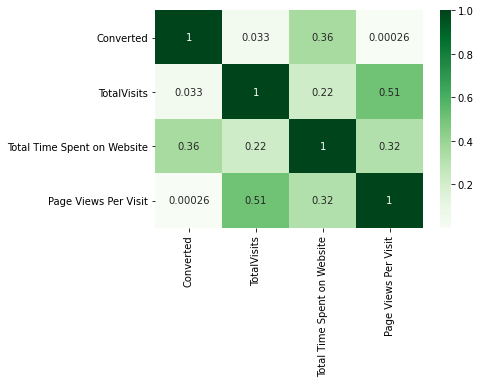

In [15]:
#we only have 4 numerical columns and rest are categorical, we have convert them all to numeric
# mean while lets see the correlation of the numerical columns
sns.heatmap(leads.corr(), annot=True, cmap="Greens")

There are not much multi colinearity

In [16]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
                       'Specialization','Tags',
       'Last Activity', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

# Using loops to do the one hot encoding of data

for i in categorical_columns:
    dummy_df = pd.get_dummies(leads[i], prefix=i, drop_first=True)
    leads = pd.concat([leads, dummy_df], axis=1)
    leads = leads.drop([i], axis=1)

In [50]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
X = leads.drop(['Converted'], axis=1)

y = leads['Converted']

In [20]:
X.head()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [21]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 3. Scaling the data

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

X_train_df.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,0.007968,0.085355,0.083333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9226,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4750,0.007968,0.619946,0.083333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7987,0.019920,0.711590,0.104167,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# incase if there are any columns with high correlation , lets drop those. 
pd.set_option('display.max_rows', 70)
leads.corr()

# Create correlation matrix
corr_matrix = leads.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
print(to_drop)
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)


['Lead Source_Facebook', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Resubscribed to emails']


## 4. building the Logistics mdoel with stats model

In [24]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                          104
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.9
Date:                Wed, 08 Dec 2021   Deviance:                       2239.8
Time:                        18:49:34   Pearson chi2:                 1.20e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     17.1959   2.16e+05   7.96e-05      1.000   -4.23e+05    4.23e+05
TotalVisits                                                0.0327      0.008      3.950      0.000       0.016       0.049
Total Time Spent on Website                                0.0021      0.000     17.335      0.000       0.002       0.002
Page Views Per Visit                                      -0.0226      0.037     -0.604      0.546      -0.096       0.051
Lead Origin_Landing Page Submission                       -0.7305      0.222     -3.288      0.001      -1.166      -0.295
Lead Origin_Lead Add Form                                  0.2462      1.734      0.142      0.887      -3.153       3.646
Lead Origin_Lead Import                                    2.8175      1.929      1.461      0.144      -0.963       6.598
Lead Source_Direct Traffic                                 1.4662      1.730      0.847      0.397      -1.925       4.857
Lead Source_Google                                         1.7491      1.727      1.013      0.311      -1.636       5.134
Lead Source_Live Chat                                     21.6837   1.53e+05      0.000      1.000   -2.99e+05    2.99e+05
Lead Source_NC_EDM                                        28.3124   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                     2.7271      1.731      1.575      0.115      -0.666       6.120
Lead Source_Organic Search                                 1.4883      1.732      0.859      0.390      -1.907       4.883
Lead Source_Pay per Click Ads                            -17.4626   2.16e+05  -8.08e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Press_Release                                -19.9671   2.16e+05  -9.24e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Reference                                      2.5710      1.704      1.509      0.131      -0.768       5.910
Lead Source_Referral Sites                                 1.5774      1.796      0.878      0.380      -1.942       5.097
Lead Source_Social Media                                   3.9735      6.722      0.591      0.554      -9.201      17.148
Lead Source_WeLearn                                    -1.564e-09   3.81e-05  -4.11e-05      1.000   -7.47e-05    7.47e-05
Lead Source_Welingak Website                               6.8543      1.800      3.807      0.000       3.326      10.383
Lead Source_bing                                           2.6767      2.324      1.152      0.249      -1.878       7.231
Lead Source_blog                                         -22.2367   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Sou

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)


In [26]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False])

In [27]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 76),
 ('Total Time Spent on Website', False, 88),
 ('Page Views Per Visit', False, 84),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', False, 11),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 27),
 ('Lead Source_Google', False, 49),
 ('Lead Source_Live Chat', False, 87),
 ('Lead Source_NC_EDM', False, 8),
 ('Lead Source_Olark Chat', False, 33),
 ('Lead Source_Organic Search', False, 67),
 ('Lead Source_Pay per Click Ads', False, 85),
 ('Lead Source_Press_Release', False, 83),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 55),
 ('Lead Source_WeLearn', False, 91),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 89),
 ('Lead Source_blog', False, 52),
 ('Lead Source_google', False, 45),
 ('Lead Source_testone', False, 73),
 ('Lead Source_welearnblog_Home', False, 41),
 ('Lead Source_youtubechannel',

In [28]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Do Not Call_Yes',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
   

In [29]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1398.8
Date:                Wed, 08 Dec 2021   Deviance:                       2797.5
Time:                        18:49:39   Pearson chi2:                 1.24e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5011      0.071    -21.203      0.000      -1.640      -1.362
Lead Source_Welingak Website                 4.5371      0.745      6.093      0.000       3.078       5.997
Tags_Closed by Horizzon                      7.4778      0.721     10.365      0.000       6.064       8.892
Tags_Diploma holder (Not Eligible)          -2.1737      1.035     -2.101      0.036      -4.202      -0.146
Tags_Interested in other courses            -1.3319      0.326     -4.080      0.000      -1.972      -0.692
Tags_Lost to EINS                            6.7221      0.727      9.246      0.000       5.297       8.147
Tags_Not doing further education            -2.6253      1.029     -2.551      0.011      -4.642      -0.608
Tags_Ringing                                -3.5543      0.244    -14.560      0.000      -4.033      -3.076
Tags_Will revert after reading the email     5.2010      0.194     26.800      0.000       4.821       5.581
Tags_invalid number                        -25.1873    2.5e+04     -0.001      0.999    -4.9e+04     4.9e+04
Tags_number not provided                   -25.1389   4.35e+04     -0.001      1.000   -8.52e+04    8.51e+04
Tags_opp hangup                             -1.9708      0.790     -2.495      0.013      -3.519      -0.423
Tags_switched off                           -3.6706      0.521     -7.050      0.000      -4.691      -2.650
Tags_wrong number given                    -25.1467   3.38e+04     -0.001      0.999   -6.63e+04    6.62e+04
Last Activity_SMS Sent                       2.3610      0.108     21.779      0.000       2.148       2.573
Last Notable Activity_Modified              -1.9540      0.123    -15.892      0.000      -2.195      -1.713
============================================================================================================
"""

In [30]:
#as we see that there are few colums that are statistically in significant, we shall drop those
col = col.drop('Tags_invalid number', 1)
col = col.drop('Tags_number not provided', 1)
col = col.drop('Tags_wrong number given', 1)

In [31]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# lets check the VIF to make the model appropriate

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Tags_Closed by Horizzon,1.04
0,Lead Source_Welingak Website,1.03
4,Tags_Lost to EINS,1.03
5,Tags_Not doing further education,1.03
9,Tags_switched off,1.03
2,Tags_Diploma holder (Not Eligible),1.01
8,Tags_opp hangup,1.00
3,Tags_Interested in other courses,0.34
7,Tags_Will revert after reading the email,0.14
11,Last Notable Activity_Modified,0.13


In [32]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1448.7
Date:                Wed, 08 Dec 2021   Deviance:                       2897.4
Time:                        18:49:39   Pearson chi2:                 1.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5578      0.071    -22.028      0.000      -1.696      -1.419
Lead Source_Welingak Website                 4.5984      0.741      6.204      0.000       3.146       6.051
Tags_Closed by Horizzon                      7.4570      0.721     10.345      0.000       6.044       8.870
Tags_Diploma holder (Not Eligible)          -2.0976      1.030     -2.036      0.042      -4.117      -0.078
Tags_Interested in other courses            -1.2673      0.324     -3.909      0.000      -1.903      -0.632
Tags_Lost to EINS                            6.7057      0.726      9.233      0.000       5.282       8.129
Tags_Not doing further education            -2.5374      1.025     -2.475      0.013      -4.547      -0.528
Tags_Ringing                                -3.3738      0.242    -13.947      0.000      -3.848      -2.900
Tags_Will revert after reading the email     5.2220      0.192     27.159      0.000       4.845       5.599
Tags_opp hangup                             -1.8140      0.784     -2.314      0.021      -3.351      -0.277
Tags_switched off                           -3.4822      0.519     -6.706      0.000      -4.500      -2.464
Last Activity_SMS Sent                       2.2141      0.104     21.226      0.000       2.010       2.419
Last Notable Activity_Modified              -1.8635      0.121    -15.405      0.000      -2.101      -1.626
============================================================================================================
"""

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Tags_Closed by Horizzon,1.04
0,Lead Source_Welingak Website,1.03
4,Tags_Lost to EINS,1.03
5,Tags_Not doing further education,1.03
9,Tags_switched off,1.03
2,Tags_Diploma holder (Not Eligible),1.01
8,Tags_opp hangup,1.00
3,Tags_Interested in other courses,0.34
7,Tags_Will revert after reading the email,0.14
11,Last Notable Activity_Modified,0.13


VIF values are less than 2 so we dont have to drop any columns here

In [34]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.173965
1012    0.173965
9226    0.010141
4750    0.658425
7987    0.995924
1281    0.997208
2880    0.173965
4971    0.658425
7536    0.975015
1248    0.010141
dtype: float64

In [35]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['lead'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,lead
3009,0,0.173965,3009
1012,0,0.173965,1012
9226,0,0.010141,9226
4750,1,0.658425,4750
7987,1,0.995924,7987


In [36]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,lead,predicted
3009,0,0.173965,3009,0
1012,0,0.173965,1012,0
9226,0,0.010141,9226,0
4750,1,0.658425,4750,1
7987,1,0.995924,7987,1


##  5. Evaluating the model

In [37]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3726  179]
 [ 318 2128]]


In [38]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9217446071484805


In [39]:
# Lets evaluate other metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [40]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8699918233851186

In [41]:
# Let us calculate specificity
TN / float(TN+FP)

0.9541613316261204

In [42]:
# Drawing ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [43]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.56081946e-04, 2.56081946e-04, 2.56081946e-04, 2.56081946e-04,
        2.56081946e-04, 5.12163892e-04, 5.12163892e-04, 5.12163892e-04,
        1.02432778e-03, 1.28040973e-03, 3.07298335e-03, 6.40204866e-03,
        6.91421255e-03, 6.91421255e-03, 6.91421255e-03, 1.04993598e-02,
        1.04993598e-02, 4.58386684e-02, 4.60947503e-02, 4.73751601e-02,
        9.34699104e-02, 9.34699104e-02, 3.56978233e-01, 3.57490397e-01,
        3.61587708e-01, 4.27400768e-01, 4.50704225e-01, 4.66837388e-01,
        4.67093470e-01, 4.67605634e-01, 4.71190781e-01, 7.34699104e-01,
        7.41101152e-01, 7.42637644e-01, 7.49295775e-01, 7.58258643e-01,
        8.22535211e-01, 8.23815621e-01, 9.18822023e-01, 9.31626120e-01,
        9.32650448e-01, 9.39564661e-01, 9.54929577e-01, 9.90781050e-01,
        1.00000000e+00]),
 array([0.        , 0.00163532, 0.0032

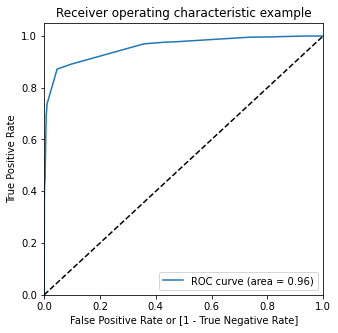

In [44]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

In [45]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,lead,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.173965,3009,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.173965,1012,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.010141,9226,0,1,0,0,0,0,0,0,0,0,0
4750,1,0.658425,4750,1,1,1,1,1,1,1,1,0,0,0
7987,1,0.995924,7987,1,1,1,1,1,1,1,1,1,1,1


In [46]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.768383  0.969338  0.642510
0.2   0.2  0.900016  0.889616  0.906530
0.3   0.3  0.922374  0.872036  0.953905
0.4   0.4  0.921745  0.869992  0.954161
0.5   0.5  0.921745  0.869992  0.954161
0.6   0.6  0.921745  0.869992  0.954161
0.7   0.7  0.892930  0.738757  0.989501
0.8   0.8  0.892615  0.737939  0.989501
0.9   0.9  0.876555  0.690515  0.993086


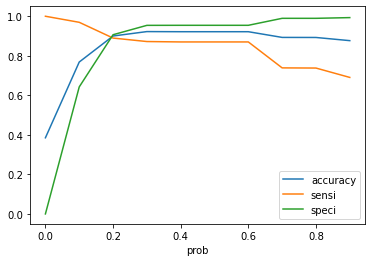

In [47]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [48]:
# For the above curve the optimal cut off is at 0.2

y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()


,Converted,Conv_Prob,lead,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.173965,3009,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.173965,1012,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.010141,9226,0,1,0,0,0,0,0,0,0,0,0,0
4750,1,0.658425,4750,1,1,1,1,1,1,1,1,0,0,0,1
7987,1,0.995924,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [49]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9000157455518816

# Conclusions:


Mostly the 'Tags' and 'last activity' influences overall output of the model 

The conversion Probability can be used as the Lead Score as mentioned in the problem Statement

The Business should focus on the certain tags Closed By Horizon, Lost to EINS 
and activities such as "Will revert after reading the email" and "Activity_SMS Sent"

Also there are negative influencers such as "Diploma holder (Not Eligible)", "Not doing further education"
"switched off" adn "Ringing, Leads with these tags and activities should be avoided probably